In [1]:
# importing pandas 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# using pandas read_csv function to load the dataset 
df = pd.read_csv("RTA Dataset.csv") 
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

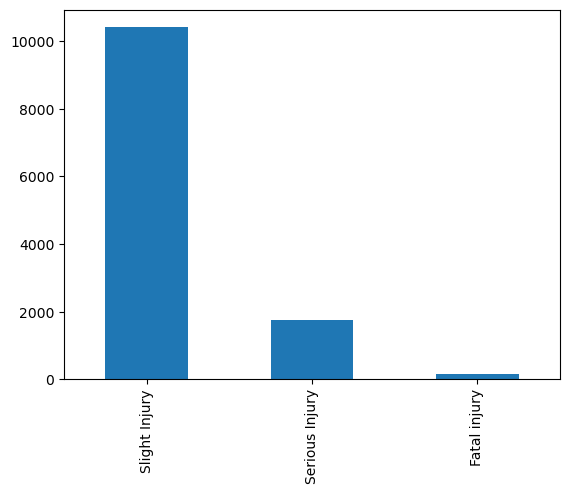

In [4]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

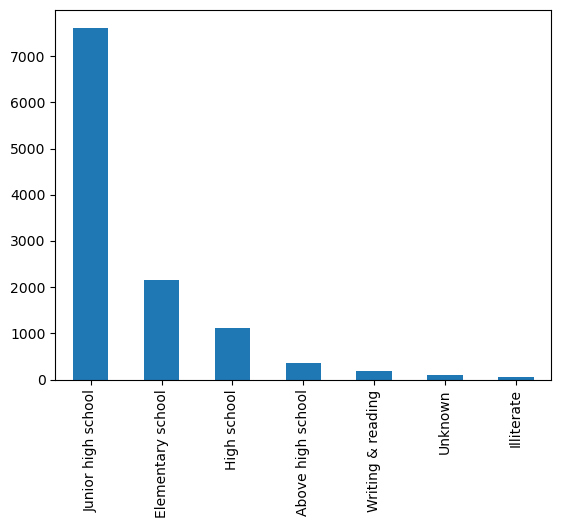

In [5]:
df['Educational_level'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

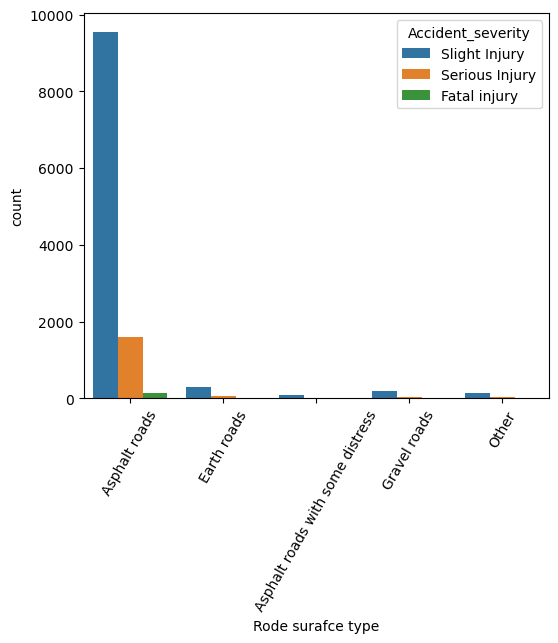

In [6]:
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

In [11]:
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
feature_df = df.copy()
feature_df['Hour_of_Day'] = feature_df['Time'].dt.hour
feature_df = feature_df.drop('Time', axis=1)
feature_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [12]:
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')


In [13]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            12

In [14]:
feature_df.shape

(12316, 32)

In [16]:
# Categorical features to encode using one hot encoding 
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# setting input features X and target y 
X = feature_df[features]  # here features are selected from 'object' datatype
y = feature_df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [17]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [18]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [19]:
fs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Number_of_vehicles_involved                            12316 non-null  int64
 1   Number_of_casualties                                   12316 non-null  int64
 2   Hour_of_Day                                            12316 non-null  int64
 3   Day_of_week_Monday                                     12316 non-null  int64
 4   Day_of_week_Saturday                                   12316 non-null  int64
 5   Day_of_week_Sunday                                     12316 non-null  int64
 6   Area_accident_occured_  Recreational areas             12316 non-null  int64
 7   Area_accident_occured_ Hospital areas                  12316 non-null  int64
 8   Area_accident_occured_ Outside rural areas             12316 non-n

In [20]:
y_en.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12316 entries, 0 to 12315
Series name: None
Non-Null Count  Dtype
--------------  -----
12316 non-null  int32
dtypes: int32(1)
memory usage: 48.2 KB


In [21]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst  = train_test_split(fs_df, y_en, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

0.9192042224928948

In [23]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.73      0.04      0.08       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.52      0.35      0.33      2464
weighted avg       0.81      0.84      0.78      2464



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.7781500979522665


In [24]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder, "ordinal_encoder2.joblib")

['ordinal_encoder2.joblib']

In [25]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']